In [13]:
%matplotlib inline
%run util_draw.py
from array import array
import rootpy as rpy
import rootpy.plotting.root2matplotlib as rplt
from rootpy.io import root_open
import numpy as np
import pandas as pd
import ROOT as r
import math
from scipy import interpolate

get_interpf = lambda h: interpolate.interp1d(list(h.x()), list(h.y()), kind='cubic')

MASS_P = 0.93827203

def interp_h1(h, X=None):
    x = list(h.x())
    y = list(h.y())
    if X is None:
        X = list(np.linspace(x[0], x[-1], 10*len(x)))
    return X, np.interp(X, x, y)

def get_interp_h2(h2, XY):
    x = list(h2.x())
    y = list(h2.y())
    z = list(h2.z())
    return interpolate.interp2d(x, y, z, kind='quintic')
    
def get_hsubd(h):
    s = r.TSpectrum()
    hbg = asrootpy(s.Background(h, 5))
    hbg.set_name('%s_bg'%h.get_name())
    hbgsubd = h.clone('%s_bgsubd'%h.get_name())
    hbgsubd.add(hbg, -1)
    return (hbgsubd, hbg, h)

def get_hmmp(W, Q2, fn='../e1f6/test/h6_top1_e1f_exp.root', tpath='h6_mmp_top1/hbd_yield'):
    with root_open(fn) as fin:
        h6 = fin[tpath]
        for iax in range(0, 6):
            ax = h6.GetAxis(iax)
            ax.SetRange(1, ax.GetNbins())
        axW = h6.GetAxis(0)
        axQ2 = h6.GetAxis(1)
        Wbin = axW.FindBin(W)
        Q2bin = axQ2.FindBin(Q2)
        axW.SetRange(Wbin, Wbin)
        axQ2.SetRange(Q2bin, Q2bin)
        hmmp = h6.Projection(5)
        hmmp.SetDirectory(0)
        Wmid = 1000*axW.GetBinCenter(Wbin)
        Q2mid = 1000*axQ2.GetBinCenter(Q2bin)
        hmmp.SetName('hmmp_%d_%d'%(Wmid, Q2mid))
        return asrootpy(hmmp)

def draw_w(fn, tpath, ax, bgsub=False, mmplo=0.6, mmphi=0.95):
    W = np.arange(1.74, 2.8, 0.02)
    for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
        Y = []
        X = []
        for w in W:
            hmmp = get_hmmp(w,q2, fn, tpath)
            if bgsub:
                hmmp = get_hsubd(hmmp)[0]
            wbin0 = hmmp.FindBin(mmplo)
            wbin1 = hmmp.FindBin(mmphi)
            y = hmmp.integral(wbin0, wbin1)
            if y > 0:
                Y.append(y)
                X.append(w)
            del hmmp
        ax.plot(X, Y, 'o', label='%.1f'%q2)
    ax.legend()
    ax.grid()
    
def draw_q2(fn, tpath, ax, bgsub=False, mmplo=0.6, mmphi=0.95):
    W = np.arange(1.74, 1.9, 0.02) #2.8, 0.02)
    points = []
    for q2,q2width in zip([1.6, 1.9, 2.3, 3.3, 4.5], [0.25, 0.35, 0.79, 1.11, 1.5]):
        Y = 0
        for w in W:
            hmmp = get_hmmp(w,q2, fn, tpath)
            if bgsub:
                hmmp = get_hsubd(hmmp)[0]
            wbin0 = hmmp.FindBin(mmplo)
            wbin1 = hmmp.FindBin(mmphi)
            y = hmmp.integral(wbin0, wbin1)
            del hmmp
            Y += y
        points.append((q2, Y/q2width))
    X, Y = zip(*points)
    ax.plot(X, Y, 'o')
    ax.grid()
    return points

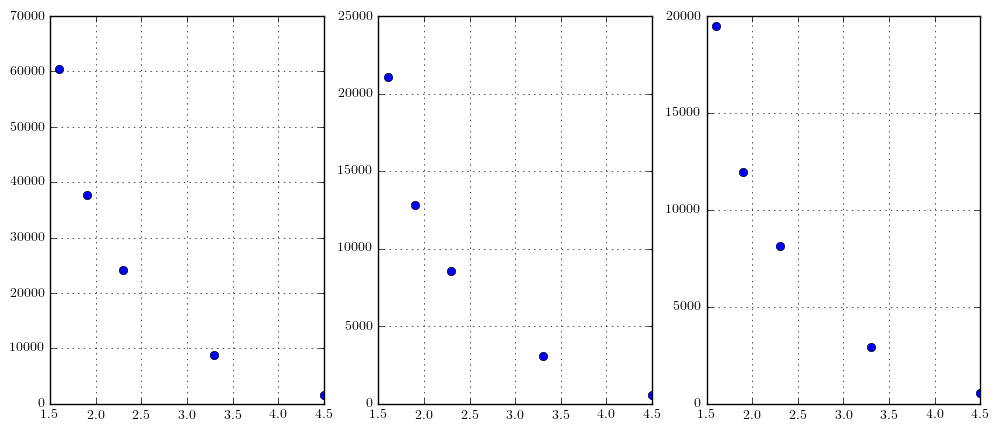

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
hq2_1 = draw_q2('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
                'h6_mmp_top1_badsc_pcor/hbd_yield', ax1)
hq2_2 = draw_q2('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
                'h6_mmp_top1_badsc_pcor/hbd_yield', ax2, True)
hq2_3 = draw_q2('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
                'h6_mmp_top1_badsc_pcor/hbd_yield', ax3, True, 0.7, 0.85)
plt.show()

In [12]:
with root_open('../e1f6/test/e1f_exp_top1_badsc_pcor.root') as fin:
    hbd = fin['h6_mmp_top1_badsc_pcor/hbd_yield']
    

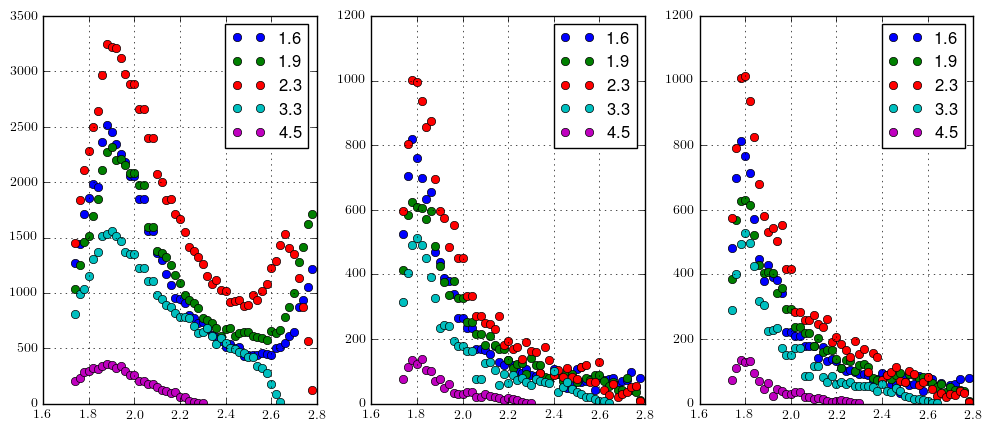

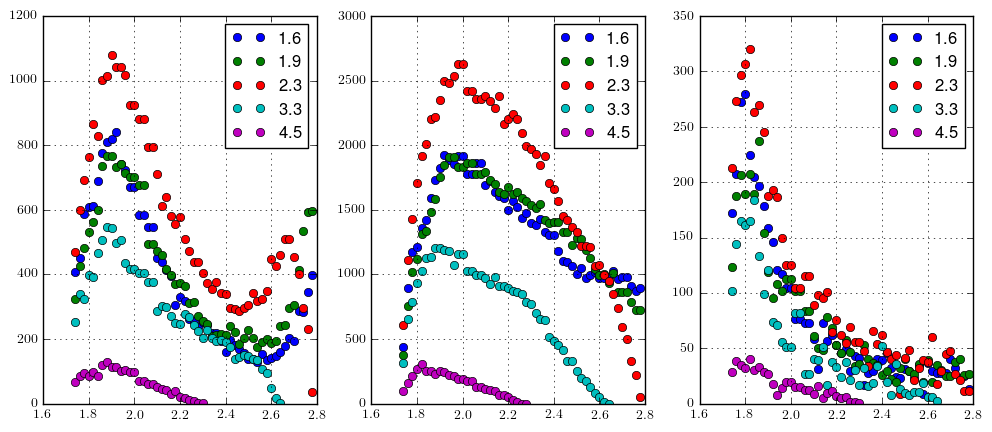

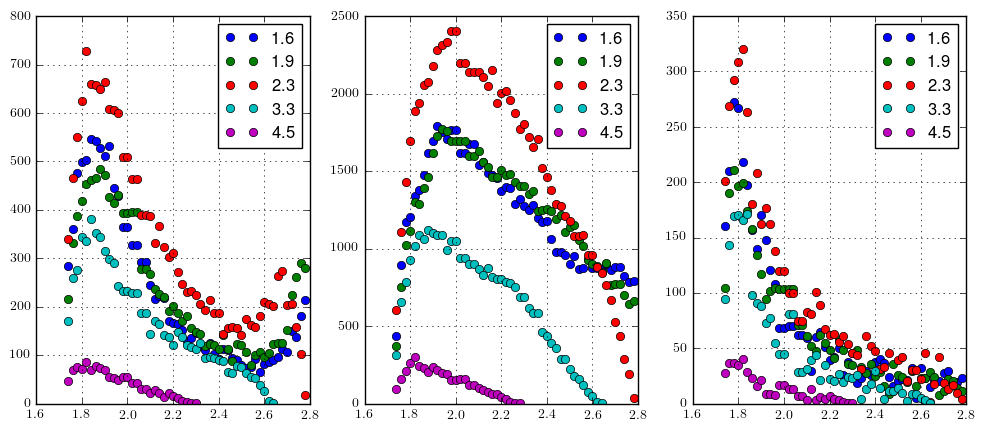

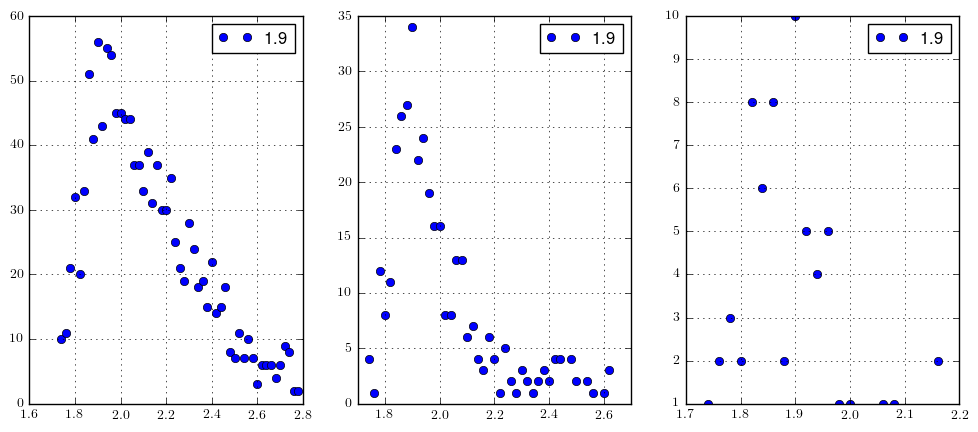

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
draw_w('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
       'h6_mmp_top1_badsc_pcor/hbd_yield', ax1)
draw_w('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
       'h6_mmp_top1_badsc_pcor/hbd_yield', ax2, True)
draw_w('../e1f6/test/e1f_exp_top1_badsc_pcor.root',
       'h6_mmp_top1_badsc_pcor/hbd_yield', ax3, True, 0.7, 0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
draw_w('../e1f6/test/e1f_exp_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax1)
draw_w('../e1f6/test/e1f_sim_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax2)
draw_w('../e1f6/test/e1f_exp_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax3, True)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
draw_w('../e1f6/test/e1f_exp_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax1, False, 0.7, 0.85)
draw_w('../e1f6/test/e1f_sim_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax2, False, 0.7, 0.85)
draw_w('../e1f6/test/e1f_exp_h6_top1_badscremoved_ho.root',
       'h6_mmp_top1_badsc/hbd_yield', ax3, True, 0.7, 0.85)

W = np.arange(1.74, 2.8, 0.02)
fig, axes = plt.subplots(1,3, figsize=(12,5))
for tpath, ax in zip(['h6_3pi/hbd_yield', 'h6_4pi/hbd_yield', 'h6_5pi/hbd_yield'], axes):
    for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
        Y = []
        X = []
        for w in W:
            hmmp = get_hmmp(w,q2, '../e1f6/test/ps.root', tpath)
            wbin0 = hmmp.FindBin(0.7)
            wbin1 = hmmp.FindBin(0.9)
            y = hmmp.integral(wbin0, wbin1)
            if y > 0:
                Y.append(y)
                X.append(w)
        if len(Y) > 0:
            ax.plot(X, Y, 'o', label='%.1f'%q2)
    ax.legend()
    ax.grid()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


hmmp_1990_1625 3072.880979938274
hmmp_1990_1625 96804.0
hmmp_1990_1925 3582.52366255144
hmmp_1990_1925 103894.0
hmmp_1990_2495 4453.427854938273
hmmp_1990_2495 118569.0
hmmp_1990_3445 1597.609696502058
hmmp_1990_3445 46961.0
hmmp_1990_4750 321.0362654320985
hmmp_1990_4750 9055.0


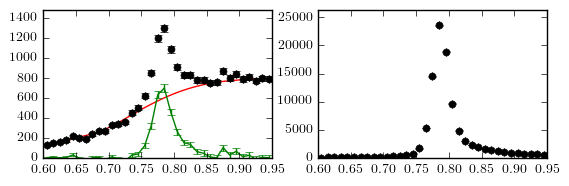

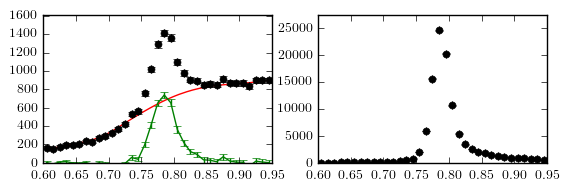

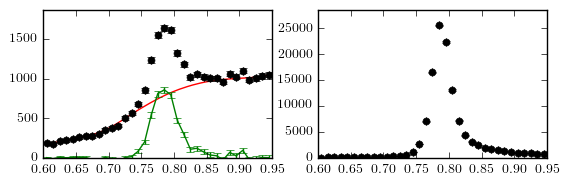

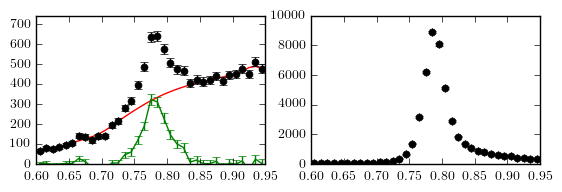

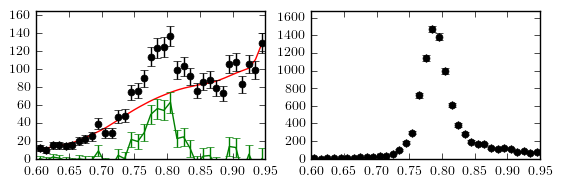

In [3]:
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    hmmp = get_hmmp(2,q2)
    hmmp2 = get_hmmp(2,q2, '../e1f6/test/e1f_sim_skim_small_top123_top1_hists_only.root', 'h6recon_top123_top1/hbd_yield')
    fig = mdraw([hmmp, hmmp2], 2)
    for iax, h in enumerate([hmmp, hmmp2]):
        hbgsubd = h
        if iax==0:
            (hbgsubd, hbg, hsig) = get_hsubd(h)
            ax = fig.axes[iax]
#             ax.plot(list(hsig.x()), list(hsig.y()))
            ax.plot(*interp_h1(hbg), color='r', axes=ax)
            Yerr = list([y[0] for y in hbgsubd.yerr()])
            ax.errorbar(list(hbgsubd.x()), list(hbgsubd.y()), Yerr)
        print(h.get_name(), hbgsubd.integral(1, hbgsubd.get_nbins_x()))
        
#     (hbgsubd, hbg, h) = get_hsubd(hmmp)
#     fig = draw(h, ecolor='k', marker='')
#     plt.plot(*interp_h1(hbg), color='r')
#     # draw(hbg, fig=fig)
#     # draw(hbgsubd, fig=fig, ecolor='g', marker='')
#     rplt.errorbar(hbgsubd, ecolor='g', marker='', xerr=False)
#     print(hmmp.get_name(), hbgsubd.integral(1, hbgsubd.get_nbins_x()))

In [55]:
q2 = 2
W = np.arange(1.8, 2.8, 0.02)
Y = [get_hsubd(get_hmmp(w,q2))[0].integral() for w in W]

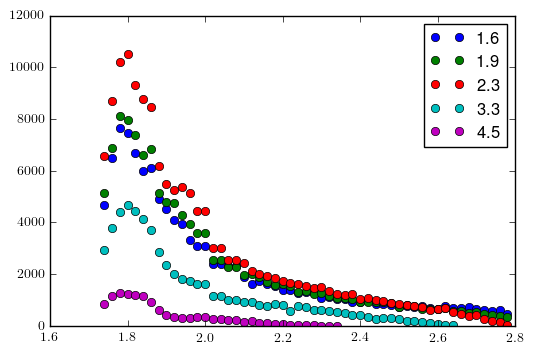

KeyboardInterrupt: 

In [4]:

W = np.arange(1.74, 2.8, 0.02)
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    Y = []
    X = []
    for w in W:
        y = get_hsubd(get_hmmp(w,q2))[0].integral()
        if y > 0:
            Y.append(y)
            X.append(w)
    plt.plot(X, Y, 'o', label='%.1f'%q2)
plt.legend()
plt.show()

W = np.arange(1.8, 2.8, 0.02)
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    Y = []
    X = []
    for w in W:
        y = get_hmmp(w,q2, '../e1f6/test/e1f_sim_skim_small_top123_top1_hists_only.root', 'h6recon_top123_top1/hbd_yield').integral()
        if y > 0:
            Y.append(y)
            X.append(w)
    plt.plot(X, Y, 'o', label='%.1f'%q2)
plt.legend()
plt.show()

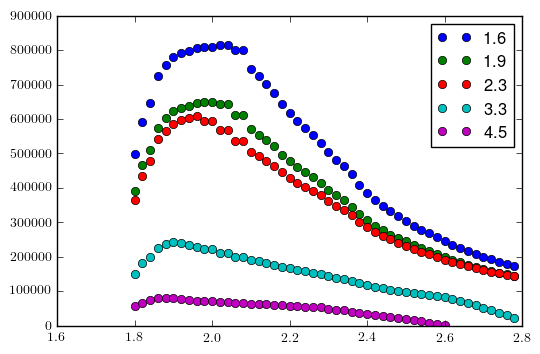

In [7]:
W = np.arange(1.8, 2.8, 0.02)
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    Y = []
    X = []
    for w in W:
        y = get_hmmp(w,q2, '../e1f6/test/e1f_sim_hists_only.root', 'h6thrown/hbd_yield').integral()
        if y > 0:
            Y.append(y)
            X.append(w)
    plt.plot(X, Y, 'o', label='%.1f'%q2)
plt.legend()

In [9]:
W

array([ 1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,  1.96,
        1.98,  2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,  2.14,
        2.16,  2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,  2.32,
        2.34,  2.36,  2.38,  2.4 ,  2.42,  2.44,  2.46,  2.48,  2.5 ,
        2.52,  2.54,  2.56,  2.58,  2.6 ,  2.62,  2.64,  2.66,  2.68,
        2.7 ,  2.72,  2.74,  2.76,  2.78])

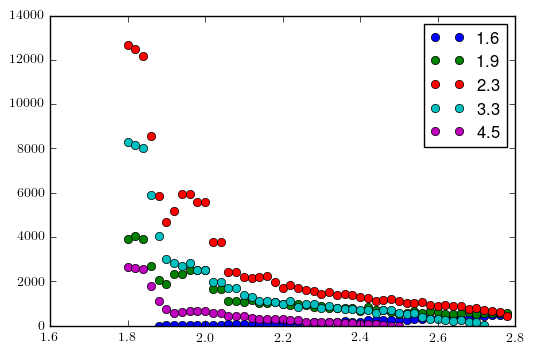

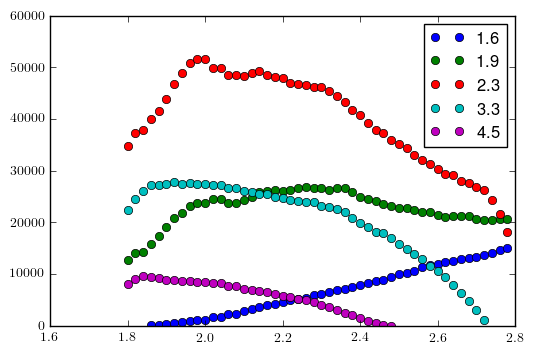

In [3]:
W = np.arange(1.8, 2.8, 0.02)
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    Y = []
    X = []
    for w in W:
        y = get_hsubd(get_hmmp(w,q2, '../e1f6/test/h6_top1_e16_exp.root'))[0].integral()
        if y > 0:
            Y.append(y)
            X.append(w)
    plt.plot(X, Y, 'o', label='%.1f'%q2)
plt.legend()
plt.show()

W = np.arange(1.8, 2.8, 0.02)
for q2 in [1.6, 1.9, 2.3, 3.3, 4.5]:
    Y = []
    X = []
    for w in W:
        y = get_hmmp(w,q2, '../e1f6/test/e16_sim_skim_small_top123_top1_hists_only.root', 'h6recon_top123_top1/hbd_yield').integral()
        if y > 0:
            Y.append(y)
            X.append(w)
    plt.plot(X, Y, 'o', label='%.1f'%q2)
plt.legend()

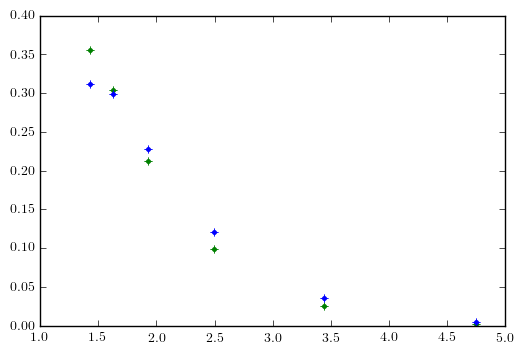

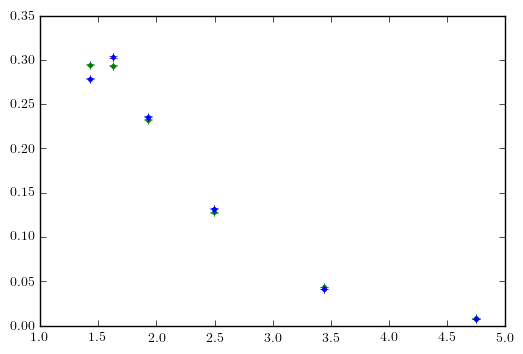

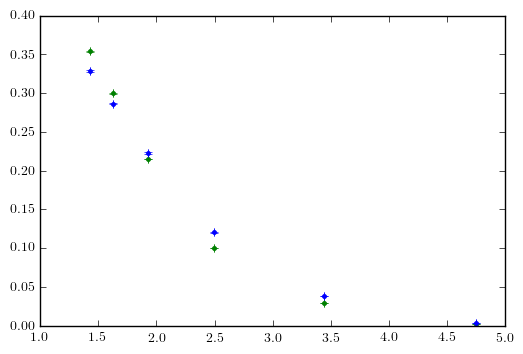

In [24]:
with root_open('../e1f6/test/e1f_sim_skim_small_top123_top1_hists_only.root') as fin:
    tpath = 'h6recon_top123_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'g.')

with root_open('../e1f6/test/h6_top1_e1f_exp.root') as fin:
    tpath = 'h6_mmp_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'b.')

plt.show()

with root_open('../e1f6/test/e1f_sim_skim_small_top123_top1_hists_only.root') as fin:
    tpath = 'h6recon_top123_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    iwlo = h6.GetAxis(0).FindBin(1.8)
    iwhi = h6.GetAxis(0).FindBin(1.9)
    h6.GetAxis(0).SetRange(iwlo, iwhi)
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'g.')

with root_open('../e1f6/test/h6_top1_e1f_exp.root') as fin:
    tpath = 'h6_mmp_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    iwlo = h6.GetAxis(0).FindBin(1.8)
    iwhi = h6.GetAxis(0).FindBin(1.9)
    h6.GetAxis(0).SetRange(iwlo, iwhi)
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'b.')

plt.show()

with root_open('../e1f6/test/e1f_sim_skim_small_top123_top1_hists_only.root') as fin:
    tpath = 'h6recon_top123_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    iwlo = h6.GetAxis(0).FindBin(2.1)
    iwhi = h6.GetAxis(0).FindBin(2.2)
    h6.GetAxis(0).SetRange(iwlo, iwhi)
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'g.')

with root_open('../e1f6/test/h6_top1_e1f_exp.root') as fin:
    tpath = 'h6_mmp_top1/hbd_yield'
    h6 = fin[tpath]
    for iax in range(0, 6):
        ax = h6.GetAxis(iax)
        ax.SetRange(1, ax.GetNbins())
    iwlo = h6.GetAxis(0).FindBin(2.1)
    iwhi = h6.GetAxis(0).FindBin(2.2)
    h6.GetAxis(0).SetRange(iwlo, iwhi)
    hQ2 = h6.Projection(1)
    hQ2.Scale(1, 'width')
    hQ2.Scale(1/hQ2.Integral())
    hQ2 = asrootpy(hQ2)
    plt.errorbar(list(hQ2.x()), list(hQ2.y()), list([y[0] for y in hQ2.yerr()]),
                 False, 'b.')

plt.show()

In [17]:
def bgfun(x, p):
    pol2 = p[0]+p[1]*x[0]+p[2]*x[0]*x[0]
    #print(p[3], x[0], p[4])
    drop = 1 - math.erf((x[0]-p[3])/p[4])
#     if (x[0] > 0.5 and x[0] < 0.6) or (x[0] > 0.7 and x[0] < 0.92): r.TF1.RejectPoint()
    if x[0] > 0.7 and x[0] < 0.89: r.TF1.RejectPoint()
    return pol2*drop/2

def drop(x, p):
    return 1 - math.erf((x[0]-p[0])/p[1])

def gausdrop(x, p):
    gaus = p[0]*math.exp(-0.5*pow(((x[0]-p[1])/p[2]), 2))
    return gaus*drop(x, [p[3],p[4]])/2

def fitfun(x, p):
    pol2 = p[0]+p[1]*x[0]+p[2]*x[0]*x[0]
    gaus = p[5]*math.exp(-0.5*pow(((x[0]-p[6])/p[7]), 2))
    return (gaus+pol2)*drop(x, [p[3],p[4]])/2

def fit_mmp(h, fout=None):
    '''
    Fit histogram with (gauss+pol2)*(erf cutoff).
    Return tuple of W, Q2, histogram, function, fit parameters, chi2, FCstatu.
    + Cutoff parameters estimated from phase space edge from W.
    + Background parameters estimated by fitting with signal, skipping signal region.
    + Signal parameters estimated by subtracting initial background and fitting in
      vicinity of the omega mass mean.
    + Full histogram fitted with combined function.
    TODO:  add option to provide initial parameter estimates.
    '''
    result = []
    # ######### get W,Q2 bin information
    W, Q2 = h.GetName().split('_')[1:]
    W = float(W)/1000.0
    Q2 = float(Q2)/1000.0
    wlow, whigh = W-0.010, W+0.010  # W bins are 20 MeV
    # ######### calculate MMp phase space edge range
    mmpax = h.GetXaxis()
    x0 = math.sqrt(wlow**2+MASS_P**2-2*wlow*MASS_P)
    x1 = math.sqrt(whigh**2+MASS_P**2-2*whigh*MASS_P)
    # ######### setup fit functions
    fgaus = r.TF1('fgaus', gausdrop, 0.6, 0.95, 5) #0.4, 1.2, 5)
    fgaus.SetParameters(r.Double(20), r.Double(0.783), r.Double(0.20), r.Double((x1+x0)*0.5), r.Double(x1-x0))
    fgaus.SetParLimits(0, 0.01, 1e4)
    fgaus.SetParLimits(1, 0.773, 0.793)
    fgaus.SetParLimits(2, 0.011, 0.035)
    fgaus.SetParLimits(3,x0+(x1-x0)/4,x1-(x1-x0)/4)
    fgaus.SetParLimits(4,0.15*(x1-x0), 2*(x1-x0))
    fbg = r.TF1('fbg', bgfun, 0.4, 1.2, 5)
    fbg.SetParameters(r.Double(0), r.Double(0), r.Double(0), r.Double((x1+x0)*0.5), r.Double(x1-x0))
    if x0 > 0.95:
        fbg.FixParameter(3, x1)
        fbg.FixParameter(4, x1-x0)
    else:
        fbg.SetParLimits(3,x0+(x1-x0)/4,x1-(x1-x0)/4)
        fbg.SetParLimits(4,0.15*(x1-x0), 2*(x1-x0))
#     fbg.SetParLimits(2, 0.01, 1e9)
    # ######### fit background for parameter estimates
    h.Fit(fbg, '', 'goff', 0.6, 0.95) #0.4, 1.2)
    if True:  #r.gMinuit.fCstatu.startswith('CONV'):
        # ######### fit signal for parameter estimates
        wsig = h.Clone()
        wsig.Add(fbg, -1)
        sigint = wsig.Integral(mmpax.FindBin(0.76), mmpax.FindBin(0.80))
        sigint = sigint if sigint > 0 else h.Integral(mmpax.FindBin(0.76), mmpax.FindBin(0.80))
        fgaus.SetParLimits(0, 0.1*sigint, 2*sigint)
        wsig.Fit(fgaus, '', '', 0.76, 0.80)
        if True:  #r.gMinuit.fCstatu.startswith('CONV'):
            # ######### create combined signal-background function and set parameters
            fsigbg = r.TF1('fsigbg', fitfun, 0.4, 1.2, 8)
#             fsigbg.SetParameters(r.Double(0), r.Double(0), r.Double(0.02), r.Double((x1+x0)*0.5), r.Double(x1-x0), r.Double(20), r.Double(0.783), r.Double(0.022))
            p0, p1, p2 = fbg.GetParameter(0), fbg.GetParameter(1), fbg.GetParameter(2)
            fsigbg.SetParameters(fbg.GetParameter(0), fbg.GetParameter(1), fbg.GetParameter(2),
                                 fbg.GetParameter(3), fbg.GetParameter(4),
                                 fgaus.GetParameter(0), fgaus.GetParameter(1), fgaus.GetParameter(2))
            fsigbg.SetParLimits(0, 0.85*p0, 1.15*p0)
            fsigbg.SetParLimits(1, 0.85*p1, 1.15*p1)
            fsigbg.SetParLimits(2, 0.85*p2, 1.15*p2)
#             fsigbg.SetParLimits(2, 0.0001, 1e9)
            fsigbg.SetParLimits(3,x0+(x1-x0)/4,x1-(x1-x0)/4)
            fsigbg.SetParLimits(4,0.15*(x1-x0), 2*(x1-x0))
            #fsigbg.SetParLimits(3,0.65,2)
            #fsigbg.SetParLimits(4,0.03, 0.2)
            fsigbg.SetParLimits(5, 0.1*sigint, 2*sigint)
            fsigbg.SetParLimits(6, 0.773, 0.793)
            fsigbg.SetParLimits(7, 0.011, 0.035)
            # ######### fit signal and background
            h.Fit(fsigbg, '', 'goff', 0.6, 0.95) #0.4, 1.2)
            if True:  #r.gMinuit.fCstatu.startswith('CONV'):
                q = fsigbg.GetChisquare()/fsigbg.GetNDF() if fsigbg.GetNDF() > 0 else -1
                result += [W,Q2]
                result.append(h),
                result.append(tuple([fbg.GetParameter(ipar) for ipar in range(0,5)]))
                result.append(h.GetListOfFunctions()[0])
                result.append(tuple([fsigbg.GetParameter(ipar) for ipar in range(0,8)]))
                result.append(q)
                result.append(r.gMinuit.fCstatu)
                if fout is not None: fout.WriteObject(h, h.GetName())
    return tuple(result) if result is not None else None

.
.


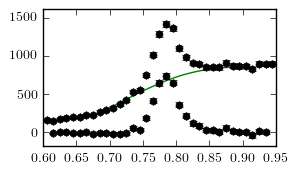

In [148]:
fig = draw(hmmp)
print('.')
s = r.TSpectrum()
h = asrootpy(s.Background(hmmp, 5))
xlin = np.linspace(0.7, 0.9)
ybg = [get_interpf(h)(x) for x in xlin]
plt.plot(xlin, ybg)
hmmp_bgsubd = hmmp.clone('%s_bgsubd'%hmmp.get_name())

hmmp_bgsubd.add(h, -1)
draw(hmmp_bgsubd, fig=fig)
print('.')

In [111]:
W, Q2, hmmp, bgparms, f, parms, q, stat = fit_mmp(hmmp)

INFO:ROOT.TCanvas.Print] png file /tmp/tmprjub4fea.png has been created


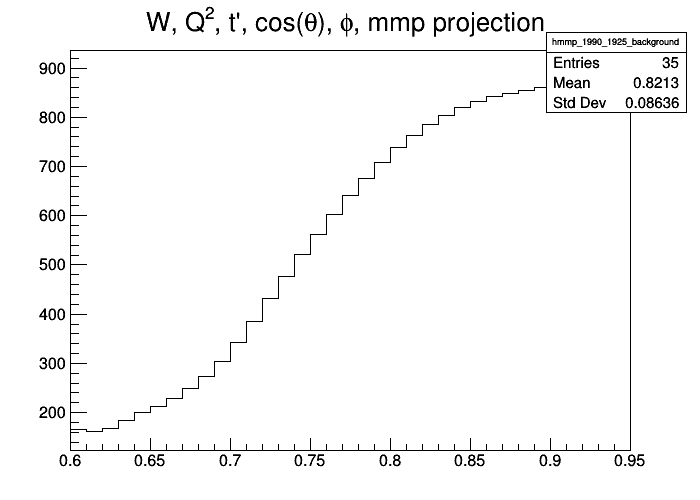

In [117]:
asrootpy(o)

5.952412836947625 CONVERGED 


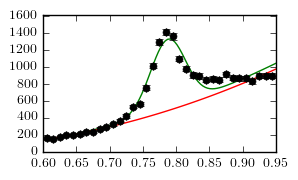

In [112]:
draw(hmmp)
fitted_points = get_points_from_TF1(f, 0.6, 0.95)
X, Y = zip(*fitted_points)
plt.plot(X, Y)
# parms_bg = [f.GetParameter(i) for i in range(0,5)]
# Y_bg = [bgfun([x], parms_bg) for x in X]
Y_bg = [bgfun([x], bgparms) for x in X]
plt.plot(X, Y_bg)
print(q, stat)

In [72]:
parms

(-326.08138487454687,
 -433.03850030311463,
 1947.8219429845035,
 1.0467279736700723,
 0.03999998327467909,
 806.5400083935685,
 0.7874544211218794,
 0.024694965398577975)